# Chapter 3 

En este capitulo desarrollare un modelo que permita predicir, los valores de venta de mis datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("e:/piere/Documentos/Portafolio/JMIA/Data/Proccesed/JMIA_Limpia.csv")

In [3]:
df.head(3)

,Date,Open,High,Low,Adj Close,Volume
0,2019-04-12,18.950001,25.459999,18.260000,25.459999,9472300
1,2019-04-15,26.940001,39.950001,25.629999,31.910000,12857300
2,2019-04-16,35.330002,43.500000,33.099998,43.040001,12939400


In [4]:
df.shape

(653, 6)

Para hacer nuestro modelo solo utilizaremos como X los valores de Open y Volumen. Ya que los demás, son involucrados después del cierre de las cotizaciones diarias.

In [5]:
x_cols=list(set(list(df.columns))-set(list(["Low","High","Date","Adj Close"])))
y_cols="Adj Close"

In [6]:
X=df[x_cols]
y=df[y_cols]

Utilizaré 3 modelos para comparar mis resultados. Iremos desde una regresión lineal simple hasta una robusta, pasando por una que tenga coeficiente de estandarización como ElasticNet.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=False)

In [32]:
regr=LinearRegression().fit(X_train,y_train)

In [33]:
regr_y_predict=regr.predict(X_test)

In [34]:
atest=regr.score(X_test,y_test)
atrain=regr.score(X_train,y_train)
print(f'El score de mis datos en entramiento es de {atrain:.3f} y mi score de mis datos de test son: {atest:.3f}')

El score de mis datos en entramiento es de 0.986 y mi score de mis datos de test son: 0.979


In [35]:
mean_squared_error(y_test,regr_y_predict)

2.7941603472084293

In [36]:
a=X_test.index.tolist()
df_plt=df[df.index.isin(a)]



In [37]:
df_pred=pd.DataFrame(regr_y_predict,index=y_test.index)

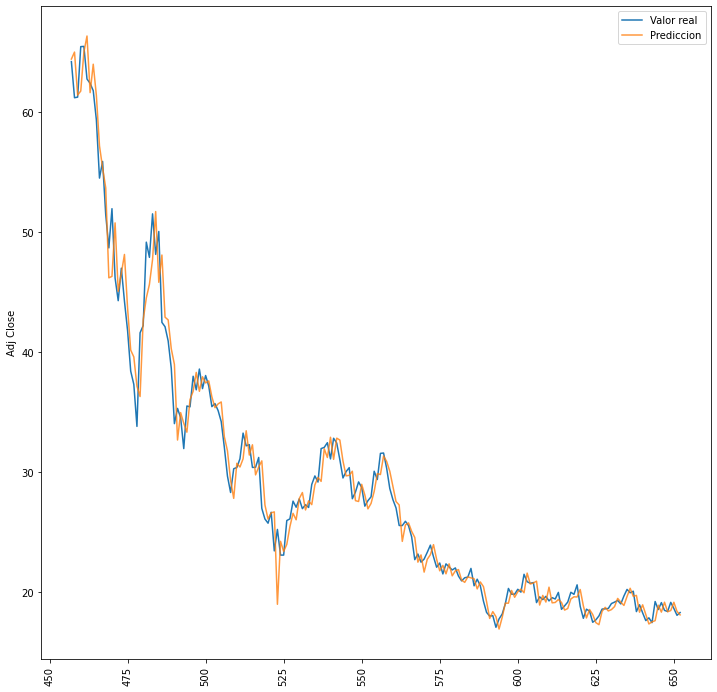

In [38]:
plt.figure(figsize=(12,12))
sns.lineplot(data=df_plt,x=df_plt.index,y=y_test,label="Valor real")
sns.lineplot(data=df_pred,x=df_pred.index,y=regr_y_predict,label="Prediccion",alpha=0.8)
plt.xticks(rotation=90);

Las consideraciones generales de mi anterior modelo, con una regresión simple, son que estamos obteniendo un excelente resultado a pesar de ser una regresión simple  sin randomización en  mis datos de entrenamiento y test. Observamos que no estamos obteniendo algún Overfitting a razón de que los resultados de Train y Test son muy semejantes. Cabe recalcar, que este gran resultado se lo podemos atribuir a la correlación prácticamente directa entre mis variables.

In [41]:
from sklearn.linear_model import ElasticNet

In [43]:
regr_elastic=ElasticNet(random_state=42).fit(X_train,y_train)

In [44]:
atest=regr.score(X_test,y_test)
atrain=regr.score(X_train,y_train)
print(f'El score de mis datos en entramiento es de {atrain:.3f} y mi score de mis datos de test son: {atest:.3f}')

El score de mis datos en entramiento es de 0.986 y mi score de mis datos de test son: 0.979


In [45]:
regr_elatic_y_predict=regr.predict(X_test)

In [47]:
mean_squared_error(y_test,regr_elatic_y_predict)

2.7941603472084293

In [48]:
df_pred_elactic=pd.DataFrame(regr_y_predict,index=y_test.index)

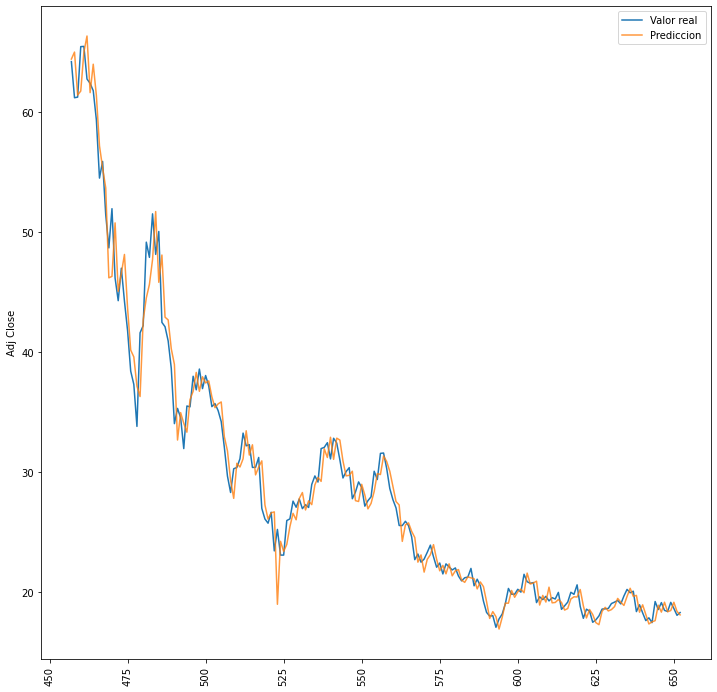

In [50]:
plt.figure(figsize=(12,12))
sns.lineplot(data=df_plt,x=df_plt.index,y=y_test,label="Valor real")
sns.lineplot(data=df_pred_elactic,x=df_pred_elactic.index,y=regr_y_predict,label="Prediccion",alpha=0.8)
plt.xticks(rotation=90);